<a href="https://colab.research.google.com/github/Rohanjos97/machine-learning-assignments/blob/main/Assignment%203/%20Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generate 100 real number for the variable X from the uniform distribution U [0, 1].

# 2. Construct the training set T = { ($x_1$,$y_1$), ($x_2$,$y_2$), ... , ($x_{100}$,$y_{100}$)} using the relation

# $Y_i$ = sin(2 π $x_i$) + $ε_i$ where $ε_i$ ~ N(0,0.25).

# In the similar way construct a testing set of size 50 Test = { ($x'_1$,$y'_1$),($x'_2$,$y'_2$),......,($x'_{50}$,$y'_{50}$)}.

Text(0.5, 1.0, 'Testing Data')

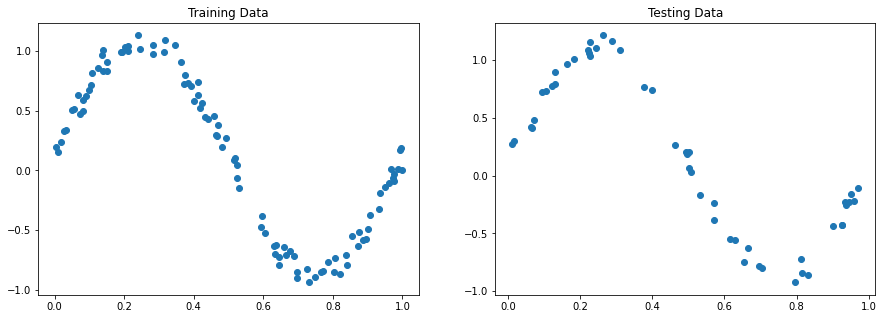

In [220]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


# Train data

# Uniform distribution of training data
X_train = np.random.uniform(0, 1, 100)

Y_train = []
for xval in X_train:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_train.append(res)



# Test data

# Uniform distribution of testing data
X_test = np.random.uniform(0, 1, 50)

Y_test = []
for xval in X_test:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_test.append(res)


# Plotting the graph of train and test data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X_train, Y_train)
ax[0].set_title('Training Data')
ax[1].scatter(X_test, Y_test)
ax[1].set_title('Testing Data')

# 3. Estimate the regularized Least Squares Polynomial Regression model of order M= 9, using the training set T using direct method. You also need to tune the regularization parameter λ which corresponds to minimum RMSE. After tuning the parameter λ, evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

## NOTE: Tuning for λ = 0.1, 0.05, $2^{-7}$, 0.0002 values.

In [221]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset)

reg_LSP_ord_9 = np.array(regularized_LSPR(X_train, Y_train, 9, 0))
reg_LSP_ord_9_1 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.1))
reg_LSP_ord_9_05 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.05))
reg_LSP_ord_9_27 = np.array(regularized_LSPR(X_train, Y_train, 9, math.pow(2, -7)))
reg_LSP_ord_9_0002 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.0002))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_1}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_05}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_27}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_0002}')

coefficient value with regularization and λ = 0: [[ 0.69496741  0.99206467 -3.04221888 -2.12087375 -0.58083569  0.5035509
   1.04384224  1.16831757  1.01792544  0.70197853]]
coefficient value with regularization and λ = 1: [[ 0.61010243  1.8576288  -4.30888648 -2.65434644 -0.2846497   1.17211754
   1.6702985   1.47741727  0.85388508 -0.00784523]]
coefficient value with regularization and λ = 2^-7: [[ 0.32982725  5.05103075 -9.77419985 -4.45909094  1.60455896  4.49029994
   4.49750134  2.60820985 -0.34036427 -3.77137402]]
coefficient value with regularization and λ = 2^-7: [[  0.10377177   7.7904786  -14.7135534   -6.71816401   4.85045419
    8.66623847   6.2573795    1.48199197  -2.75395666  -4.87714207]]


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

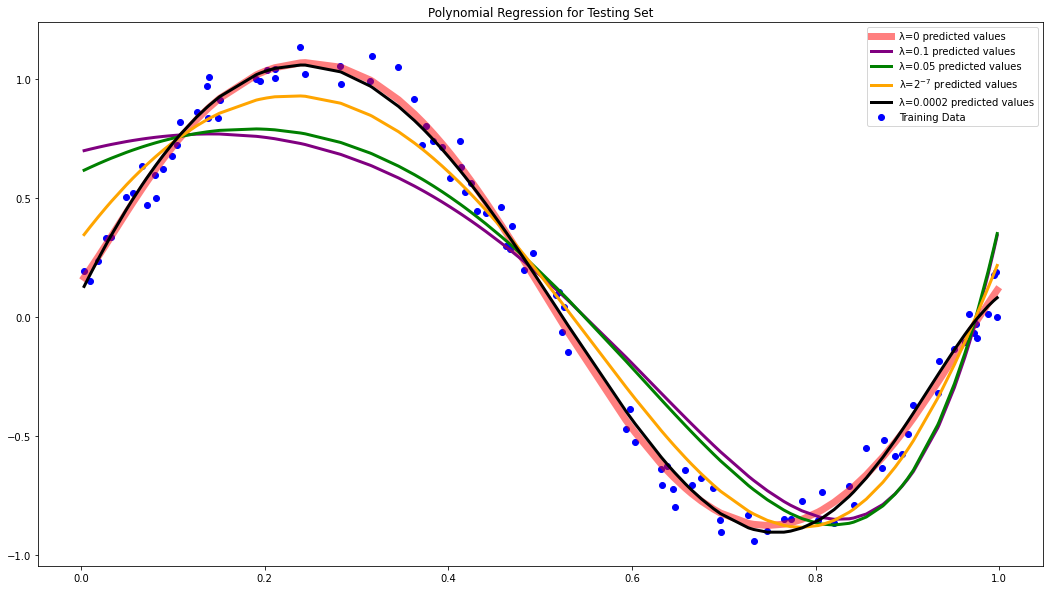

In [243]:
y_predicted_m9, y_predicted_m9_1, y_predicted_m9_05, y_predicted_m9_27, y_predicted_m9_0002 = [], [], [], [], []
X = X_train

for val in X:
  y_val = 0
  y1_val = 0
  y05_val = 0
  y27_val = 0
  y0002val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9[0][deg] * math.pow(val, deg)
    y1_val += reg_LSP_ord_9_1[0][deg] * math.pow(val, deg)
    y05_val += reg_LSP_ord_9_05[0][deg] * math.pow(val, deg)
    y27_val += reg_LSP_ord_9_27[0][deg] * math.pow(val, deg)
    y0002val += reg_LSP_ord_9_0002[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)
  y_predicted_m9_1.append(y1_val)
  y_predicted_m9_05.append(y05_val)
  y_predicted_m9_27.append(y27_val)
  y_predicted_m9_0002.append(y0002val)

# Sorting the data to plot line graph
df_predicted_m9 = pd.DataFrame(data=(X, y_predicted_m9),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_1 = pd.DataFrame(data=(X, y_predicted_m9_1),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_05 = pd.DataFrame(data=(X, y_predicted_m9_05),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_27 = pd.DataFrame(data=(X, y_predicted_m9_27),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_0002 = pd.DataFrame(data=(X, y_predicted_m9_0002),index=['X', 'Y_predicted']).T.sort_values(by='X')


# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 1, figsize=(18, 10))
axes.scatter(X_train, Y_train, color='blue')
axes.plot(df_predicted_m9['X'], df_predicted_m9['Y_predicted'], color='red', linewidth=7, alpha=0.5)
axes.plot(df_predicted_m9_1['X'], df_predicted_m9_1['Y_predicted'], color='purple', linewidth=3)
axes.plot(df_predicted_m9_05['X'], df_predicted_m9_05['Y_predicted'], color='green', linewidth=3)
axes.plot(df_predicted_m9_27['X'], df_predicted_m9_27['Y_predicted'], color='orange', linewidth=3)
axes.plot(df_predicted_m9_0002['X'], df_predicted_m9_0002['Y_predicted'], color='black', linewidth=3)
axes.legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.05 predicted values', 'λ=$2^{-7}$ predicted values', 'λ=0.0002 predicted values', 'Training Data'])
axes.set_title('Polynomial Regression for Testing Set')

## NMSE (Normalized Mean Square Error)

In [223]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ1'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ1'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ1'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ1 = 0

rmse_m9_λ1 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ1

0.26294336293600645

In [224]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ05'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ05'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ05'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ05 = 0

rmse_m9_λ05 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ05

0.2618324781363734

In [225]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ2^-7'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ2^-7'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ1 = 0

rmse_m9_λ1 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ1

0.25200692735370184

In [226]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ0002'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ0002'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ0002'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ0002 = 0

rmse_m9_λ0002 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ0002

0.24613073789196727

## RMSE (Root Mean Square error)

In [227]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_test),index=['y predicted m9 λ1','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ1 = 0

rmse_m9_λ1 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ1 = math.sqrt(rmse_m9_λ1)
rmse_m9_λ1

0.5905260627616884

In [228]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_test),index=['y predicted m9 λ05','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ05 = 0

rmse_m9_λ05 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ05 = math.sqrt(rmse_m9_λ05)
rmse_m9_λ05

0.5952777161318914

In [229]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_test),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ27 = 0

rmse_m9_λ27 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27 = math.sqrt(rmse_m9_λ27)
rmse_m9_λ27

0.6207697906140102

In [230]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_test),index=['y predicted m9 λ0002','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0002 = 0

rmse_m9_λ0002 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0002 = math.sqrt(rmse_m9_λ0002)
rmse_m9_λ0002

0.6490574210620839

## MAE (Mean Absolute Error)

In [231]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ1 = 0
rmse_m9_λ1 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ1

0.7696478534642917

In [232]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ05 = 0
rmse_m9_λ05 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ05

0.7772706512322328

In [233]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ27 = 0
rmse_m9_λ27 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27

0.8013098505784173

In [234]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ0002 = 0
rmse_m9_λ0002 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0002

0.8249117520744633

## R2 (R-square Error)

### R2= 1 − $\frac{sum \; squared \; regression \; (SSR)}{total \; sum \; of \; squares \; (SST)}$


### R2 = $1− \frac{∑(y_i− \bar{y_i})^2}{∑(y_i−\bar{y})^2}$

In [235]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ1 = SSR/SST
R_square_λ1

0.49887720059833185

In [236]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ05 = SSR/SST
R_square_λ05

0.4876770265736823

In [237]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ27','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ27'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

0.45557767994615495

In [238]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

0.42762782623527534

# 4. Estimate the regularized Least Squares Polynomial Regression model of order M= 9, on the training set T using gradient descent method with the tuned value of λ obtained in question 3 by selecting an appropriate step length η. Compare the solution obtained by direct method and gradient descent method. Evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

In [239]:
# no_of_rows = len(X_train)
# no_of_cols = 10

# Lambda = math.pow(2, -7)
# X_Lam0 = np.zeros((no_of_rows, no_of_cols))
# lam_I = np.identity(10)*Lambda
# for xi in range (no_of_rows):
#   for deg in range (no_of_cols):
#     X_Lam0[xi][deg] += math.pow(X_train[xi], deg)

# print('X_Lam0.0001: ')
# print(X_Lam0001)